In [1]:
import math
import numpy as np
import imageio.v2 as imageio
from matplotlib import pyplot as plt
from statistics import mode

In [8]:
def otsu(img):
    counts, bin_centers = histog(img)
    n = np.sum(counts)
    mu = np.sum(bin_centers * counts) / n
    total_ssds = []
    for bin_no in range(1, 100):
        left_ssd = ssd(counts[:bin_no], bin_centers[:bin_no])
        right_ssd = ssd(counts[bin_no:], bin_centers[bin_no:])
        total_ssds.append(left_ssd + right_ssd)
    z = np.argmin(total_ssds)
    t = bin_centers[z]
    
    final_thresh = bin_centers[z]
    final_img = img.copy()

    final_img[img > final_thresh] = 1
    final_img[img < final_thresh] = 0
    return final_img

In [7]:
def ssd(counts, centers):
    """ Sum of squared deviations from mean """
    n = np.sum(counts)
    mu = np.sum(centers * counts) / n
    return np.sum(counts * ((centers - mu) ** 2))

In [6]:
def histog(img):
    counts, edges = np.histogram(img, bins=100)
    bin_centers = edges[:-1] + np.diff(edges) / 2.
    return counts,bin_centers

In [5]:
def calDisMin(a,b):
    a1 =(a,0) #x1,y1
    b1 = (b,0) # x2,y2
    resultado = np.sqrt(np.power((b1[0]-a1[0]),2)+ np.power((b1[1]-a1[1]),2))
    return resultado

In [4]:
def vecRed(vector, valor):
    vnew = []
    for i in vector:
        if (i != valor):
            vnew.append(i)
    return vnew

In [3]:
def modaImg(im_g):
    vector = im_g.flatten()
    vector.sort()

    vCl=[]
    vOs=[]
    medio = np.median(vector)
    for i in vector:
        if (i > medio):
            vCl.append(i)
        else:
            vOs.append(i) 
    modaCl = mode(vCl)
    modaOs = mode(vOs)
    
    vmoda2Cl = vecRed(vCl, modaCl)
    moda2Cl = mode(vmoda2Cl)
    vmoda2Os = vecRed(vOs, modaOs)
    moda2Os = mode(vmoda2Os)
    
    
    valorModaClara = ((modaCl+moda2Cl)/2)
    valorModaOscura = ((modaOs+moda2Os)/2)
    valor = calDisMin(valorModaClara, valorModaOscura)/2
    valorNew = (moda2Os + valor)
    img8 = im_g.copy()
    img8[im_g > valorNew] = 1
    img8[im_g < valorNew] = 0
    return img8

In [2]:
# sacar la mediana
def medianImg(im_g):
    valor_mediana= np.median(im_g)
    h,c=im_g.shape
    contador_t = 0.0
    contador_N= 0.0
    matriz_nueva=np.zeros((im_g.shape[0],im_g.shape[1]))
    for i in range(h):
        for j in range(c):
            contador_t=contador_t+1
            if (im_g[i,j] > valor_mediana):
                matriz_nueva[i,j] = 1
                contador_N=contador_N+1
            else:
                matriz_nueva[i,j]=0
    return matriz_nueva
#plt.imshow(matriz_nueva,'gray')
#print(f'porcentaje de pixel Negros',contador_N/contador_t)
#print(f'porcentaje de pixel Blancos',1-(contador_N/contador_t))

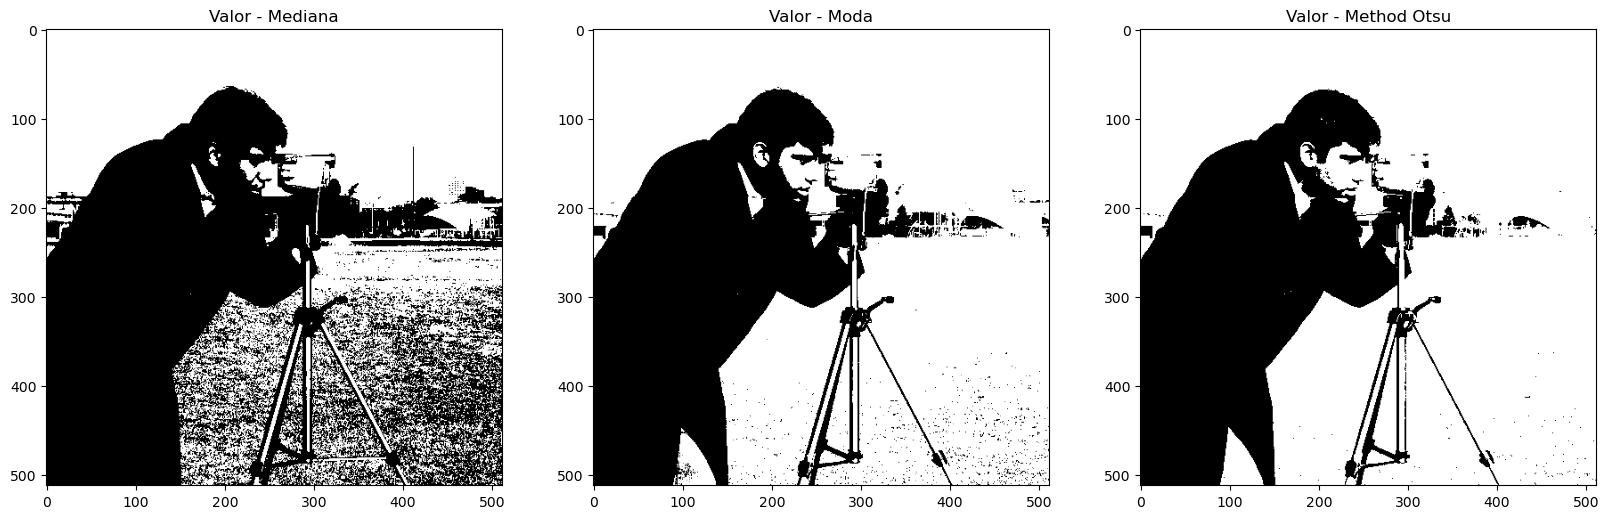

In [13]:
###Principal
#img=imageio.imread('imageio:chelsea.png')
img=imageio.imread('imageio:camera.png')

if (img.ndim == 3):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    Y= 0.299*r + 0.587*g + 0.114*b
else:
    Y = img/255.0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20,20)
ax1.imshow(medianImg(Y),'gray')
ax1.set_title('Valor - Mediana')

ax2.imshow(modaImg(Y),'gray')
ax2.set_title('Valor - Moda')

#ax3.imshow(threshold(Y, otsu_threshold(img)),'gray')
ax3.imshow(otsu(Y),'gray')
ax3.set_title('Valor - Method Otsu')
plt.show()